# 10.2 Exercise: Building a CNN Image Classifier

In [109]:
# Downloading and installing the required libraries

#%pip install tensorflow
#%pip install opencv-python
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Set that the color channel value will be first
K.set_image_data_format("channels_first")
# Set seed
np.random.seed(0)
# Set image information
channels = 1
height = 28
width = 28
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()


In [110]:
print ("The shape of the loaded dataset is\n\n",data_train.shape,'\n')

print ("The above shape means there are 60000 images each of 28*28 pixel size\n\n")

print ("The shape of the target test dataset is\n\n",target_test.shape,'\n')


The shape of the loaded dataset is

 (60000, 28, 28) 

The above shape means there are 60000 images each of 28*28 pixel size


The shape of the target test dataset is

 (10000,) 



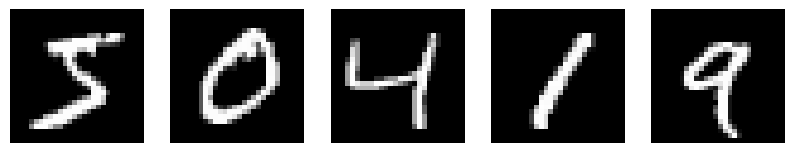

In [111]:
# Displaying the first 5 images in grayscale

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data_train[i], cmap='gray')
    plt.axis('off')

plt.show()

In [112]:
print ("The following are the first 5 training labels\n\n",target_train[:5],'\n')
print ("The displayed image number is the same as found in target variable\n")

The following are the first 5 training labels

 [5 0 4 1 9] 

The displayed image number is the same as found in target variable



Build and train a Keras CNN classifier on the MNIST training set.

In [113]:
# We are setting the channels first and the channel is 1, as it is gray scale

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)
print ("Following is the new shape of train dataset after including channels first\n",data_train.shape)
print ("Following is the shape of target train \n",target_train.shape)


Following is the new shape of train dataset after including channels first
 (60000, 1, 28, 28)
Following is the shape of target train 
 (60000,)


In [114]:
# Rescale pixel intensity to between 0 and 1
# As the maximum value of pixel intensity is 255 dividing by that.
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = tf.keras.utils.to_categorical(target_train)
target_test = tf.keras.utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
print ('The total number of columns will be 10 corresponding to the number 0 to 9\n',number_of_classes)
target_test.shape

The total number of columns will be 10 corresponding to the number 0 to 9
 10


(10000, 10)

In [7]:
# Start neural network
network = Sequential()
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,kernel_size=(5, 5),input_shape=(channels, width, height),activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))
# Compile neural network
network.compile(loss="categorical_crossentropy", optimizer="rmsprop",metrics=["accuracy"])
# Train neural network
network.fit(features_train, target_train,epochs=2, verbose=0,batch_size=1000,validation_data=(features_test, target_test)) # Data for evaluation



C:\Users\Riaz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The accuracy of the model on Test data is,

In [9]:
loss, accuracy = network.evaluate(features_test, target_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 437ms/step - accuracy: 0.9630 - loss: 0.1269
Test Accuracy: 97.00%


Displaying the confusion matrix on the test set classifications.  
To do the same, we are predicting using the model for the test dataset.  



In [64]:
test_pred=network.predict(features_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 444ms/step


Creating Confusion Matrix  

- To get the confusion matrix, the predicted output should be normalized to either 0 or 1.  This is being done by replacing the array elements with value 1, if the predicted value is more than 0.5.  If not value 0.  


In [98]:
#target_test

normalized_pred = test_pred

normalized_pred[normalized_pred > 0.5] = 1
normalized_pred[normalized_pred <= 0.5] = 0
print ("After normalizing to 0 and 1 the predicted output is\n",normalized_pred)

After normalizing to 0 and 1 the predicted output is
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [115]:
# As we are having multi class output from 0 to 9, multilabel_confusion_matrix function has been used,

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, multilabel_confusion_matrix
# Generate the confusion matrix
cm = multilabel_confusion_matrix(target_test, normalized_pred)
print("The confusion matrix for Test dataset is\n\n",cm)

The confusion matrix for Test dataset is

 [[[8993   27]
  [  13  967]]

 [[8842   23]
  [  11 1124]]

 [[8946   22]
  [  61  971]]

 [[8982    8]
  [  59  951]]

 [[8984   34]
  [  21  961]]

 [[9095   13]
  [  31  861]]

 [[9028   14]
  [  28  930]]

 [[8945   27]
  [  46  982]]

 [[8978   48]
  [  33  941]]

 [[8982    9]
  [  76  933]]]


# Summary:  

        - Loaded the dataset from the libary.  
        - Displayed the first five images in the training data set and compared with the first five training labels.  The images and the number in the target matched.  
        - Built and trained a Keras CNN classifier.  
        - Predicted using the trained model and tested the accuracy.  It was found to be 97%.  
        - Displayed a confusion matrix on the test set classifications using multilabel_confusion_matrix, as the target labels are not binary.  




